# 7. Cross Validation

Validação cruzada (CV) é uma técnica usada em Machine Learning para avaliar a capacidade de generalização e o desempenho de um modelo de ML.<br><br>
Isto envolve a criação de vários subconjuntos de dados com:
- apenas um data point, 
- ou p data points,
- ou k blocos <br>

que abranjam a totalidade dos dados e a execução iterativa de treino e avaliação de modelos nos diferentes conjuntos de dados de treino e teste em cada execução. 
Os resultados obtidos são depois agrupados.

## 7.1 Hold-Out

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the X and y data from the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape

(150, 4)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=2023)
X_train.shape

(97, 4)

In [3]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
mod_score = model.score( X_test, y_test)
mod_score

0.9622641509433962

## 7.2 Leave-One-Out

### 7.2.1 Verifica as partições

In [4]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])

loo = LeaveOneOut()
# métodos que dá o número de splits para cross validadtion
loo.get_n_splits(X)

print(loo)

# a função split faz os splits
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

LeaveOneOut()
Fold 0:
  Train: index=[1 2 3]
  Test:  index=[0]
Fold 1:
  Train: index=[0 2 3]
  Test:  index=[1]
Fold 2:
  Train: index=[0 1 3]
  Test:  index=[2]
Fold 3:
  Train: index=[0 1 2]
  Test:  index=[3]


### 7.2.2 Exemplo para calcular Score

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Load the X and y data from the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape

(150, 4)

In [6]:
model = DecisionTreeClassifier()

leave_val = LeaveOneOut()
leave_val

LeaveOneOut()

In [7]:
mod_score = cross_val_score( model, X, y, cv = leave_val)
mod_score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
print(np.mean(mod_score))

0.94


## 7.3 Leave-P-Out

### 7.3.1 Verifica as partições

In [9]:
import numpy as np
from sklearn.model_selection import LeavePOut

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])

lpo = LeavePOut(2)
# métodos que dá o número de splits para cross validadtion
lpo.get_n_splits(X)

print(lpo)

# a função split faz os splits
for i, (train_index, test_index) in enumerate(lpo.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

LeavePOut(p=2)
Fold 0:
  Train: index=[2 3]
  Test:  index=[0 1]
Fold 1:
  Train: index=[1 3]
  Test:  index=[0 2]
Fold 2:
  Train: index=[1 2]
  Test:  index=[0 3]
Fold 3:
  Train: index=[0 3]
  Test:  index=[1 2]
Fold 4:
  Train: index=[0 2]
  Test:  index=[1 3]
Fold 5:
  Train: index=[0 1]
  Test:  index=[2 3]


### 7.3.2 Exemplo para calcular Score

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import LeavePOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Load the X and y data from the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape

(150, 4)

In [11]:
model = DecisionTreeClassifier()

leave_val = LeavePOut(2)
leave_val

LeavePOut(p=2)

In [12]:
mod_score = cross_val_score( model, X, y, cv = leave_val)
mod_score

array([1., 1., 1., ..., 1., 1., 1.])

In [13]:
print(np.mean(mod_score))

0.9495749440715884


## 7.4 K-Fold
### 7.4.1 Verifica as partições

In [14]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])

kf = KFold(n_splits=2)
kf.get_n_splits(X)

2

In [15]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

KFold(n_splits=2, random_state=None, shuffle=False)
Fold 0:
  Train: index=[2 3]
  Test:  index=[0 1]
Fold 1:
  Train: index=[0 1]
  Test:  index=[2 3]


### 7.4.2 Exemplo com treino do Modelo

Nos exemplo anteriores temos estado a calcular o score, mas sem fazermos o fit não podemos usar as funções de predict e predict_proba, este é um exemplo completo que faz realmente o fit do modelo com todos os folds.

In [16]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load the X and y data from the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape

(150, 4)

In [17]:
# K-fold split
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=1972)

kf

KFold(n_splits=5, random_state=1972, shuffle=True)

In [18]:
# se quisessemos só calcular o score
model=DecisionTreeClassifier()

mod_score =  cross_val_score( model, X, y, cv = kf)

print(np.mean(mod_score))

0.9466666666666667


In [43]:
from sklearn.tree import DecisionTreeClassifier

scores = []
# Reparem que só estamos a obter os indices de split
# por isso servem tanto para X como para y
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    #... treina o modelo, etc
    model=DecisionTreeClassifier()
    model.fit(X_train, y_train)
    mod_score = model.score(X_test, y_test)
    scores.append(mod_score)
    
    
print(X_train.shape)
print(scores)
print(np.mean(scores))

(120, 4)
[1.0, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333]
0.9533333333333334


In [44]:
preds = model.predict(X_test)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

## 7.5 Repeated K-Fold

Semelhante ao K-Fold mas repetindo a técnica:

1. Escolher n_repeats – número de vezes que o modelo será treinado
2. Escolher um número de amostras que serão o conjunto de teste
3. Dividir o conjunto de dados
4. Treinar usando o conjunto de treino. A cada iteração de validação cruzada, um novo modelo deve ser treinado
5. Validar no conjunto de testes
6. Guardar o resultado da validação
7. Repita as etapas 3-6 um número n_repeats de vezes
8. Para obter a pontuação final, calcular a média dos resultados obtidos nas etapas 6

### 7.5.1 Verifica as Partições

In [45]:
import numpy as np
from sklearn.model_selection import RepeatedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 1], [2, 2]])
y = np.array([0, 0, 1, 1, 0, 1])


rkf = RepeatedKFold(n_splits=2, n_repeats=5, random_state=2652124)
rkf.get_n_splits(X, y)

10

In [46]:
RepeatedKFold(n_repeats=2, n_splits=2, random_state=2652124)
for i, (train_index, test_index) in enumerate(rkf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0 4 5]
  Test:  index=[1 2 3]
Fold 1:
  Train: index=[1 2 3]
  Test:  index=[0 4 5]
Fold 2:
  Train: index=[1 3 5]
  Test:  index=[0 2 4]
Fold 3:
  Train: index=[0 2 4]
  Test:  index=[1 3 5]
Fold 4:
  Train: index=[0 3 5]
  Test:  index=[1 2 4]
Fold 5:
  Train: index=[1 2 4]
  Test:  index=[0 3 5]
Fold 6:
  Train: index=[0 3 4]
  Test:  index=[1 2 5]
Fold 7:
  Train: index=[1 2 5]
  Test:  index=[0 3 4]
Fold 8:
  Train: index=[0 2 3]
  Test:  index=[1 4 5]
Fold 9:
  Train: index=[1 4 5]
  Test:  index=[0 2 3]


### 7.5.2 Exemplo para calcular Score

In [47]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets

# Load the X and y data from the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape

(150, 4)

In [48]:
model = DecisionTreeClassifier()

rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=2020)
rkf

RepeatedKFold(n_repeats=2, n_splits=10, random_state=2020)

In [49]:
mod_score = cross_val_score( model, X, y, cv = rkf)
print(mod_score)

[0.86666667 0.8        1.         1.         1.         1.
 0.93333333 0.93333333 1.         1.         0.93333333 1.
 1.         0.86666667 0.93333333 0.86666667 1.         1.
 1.         0.93333333]


In [50]:
print(np.mean(mod_score))

0.9533333333333334


## 7.6 Stratified K-Fold
### 7.6.1 A importância de Estratificar

In [51]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold

make_class = make_classification(n_samples=500,n_features=3,
                                 n_redundant=0,n_informative=2,
                                 n_classes=3,n_clusters_per_class=1,
                                 random_state=11)

data = pd.DataFrame(make_class[0],columns=range(make_class[0].shape[1]))
data['target'] = make_class[1]
data.head()

,0,1,2,target
0,0.035466,-0.892312,-0.380444,2
1,0.906985,1.563291,-1.761234,0
2,0.710053,0.307698,-0.325675,0
3,-0.725445,-0.957154,-0.799394,2
4,-0.413388,0.582738,1.417160,1


In [52]:
train_df,test_df = train_test_split(data,test_size=0.2,random_state=11)
print(f'PROPORTION OF TARGET IN THE ORIGINAL DATA\n{data["target"].value_counts() / len(data)}\n\n'+
      f'PROPORTION OF TARGET IN THE TRAINING SET\n{train_df["target"].value_counts() / len(train_df)}\n\n'+
      f'PROPORTION OF TARGET IN THE TEST SET\n{test_df["target"].value_counts() / len(test_df)}')

PROPORTION OF TARGET IN THE ORIGINAL DATA
1    0.342
2    0.330
0    0.328
Name: target, dtype: float64

PROPORTION OF TARGET IN THE TRAINING SET
1    0.345
2    0.345
0    0.310
Name: target, dtype: float64

PROPORTION OF TARGET IN THE TEST SET
0    0.40
1    0.33
2    0.27
Name: target, dtype: float64


In [53]:
train_df,test_df = train_test_split(data,test_size=0.2,stratify=data['target'],random_state=11)
print(f'PROPORTION OF TARGET IN THE ORIGINAL DATA\n{data["target"].value_counts() / len(data)}\n\n'+
      f'PROPORTION OF TARGET IN THE TRAINING SET\n{train_df["target"].value_counts() / len(train_df)}\n\n'+
      f'PROPORTION OF TARGET IN THE TEST SET\n{test_df["target"].value_counts() / len(test_df)}')

PROPORTION OF TARGET IN THE ORIGINAL DATA
1    0.342
2    0.330
0    0.328
Name: target, dtype: float64

PROPORTION OF TARGET IN THE TRAINING SET
1    0.3425
2    0.3300
0    0.3275
Name: target, dtype: float64

PROPORTION OF TARGET IN THE TEST SET
1    0.34
0    0.33
2    0.33
Name: target, dtype: float64


### 7.6.2 Exemplo com o treino do Modelo

In [54]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets

# Load the X and y data from the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape

(150, 4)

In [55]:
k = 5 # numero de blocos
skf = StratifiedKFold(n_splits=k, shuffle=True)
skf

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

In [56]:
model = DecisionTreeClassifier()
mod_score = cross_val_score(model, X, y,cv=skf)
mod_score

array([1.        , 0.86666667, 0.93333333, 0.96666667, 0.9       ])

In [57]:
print(np.mean(mod_score))

0.9333333333333333


In [58]:
scores = []

# o split do stratified recebe 2 argumentos
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    #... treina o modelo, etc
    model=DecisionTreeClassifier()
    model.fit(X_train, y_train)
    mod_score = model.score(X_test, y_test)
    scores.append(mod_score)
    
    
print(X_train.shape)
print(scores)
print(np.mean(scores))

(120, 4)
[1.0, 0.9333333333333333, 1.0, 1.0, 0.9]
0.9666666666666668


# 8. Random Forests
## 8.1 Construir e usar uma Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=2023, shuffle=False)
print(X)
print(y)

[[-0.7258982  -1.42320717  0.64305431  1.72172679]
 [-1.4487145  -0.44491724 -0.11411215 -1.23583606]
 [-1.37781872 -1.15842881 -0.06984053 -0.57754508]
 ...
 [ 0.81862226  1.43403615 -0.10109398  0.14017051]
 [ 0.00464745  0.64213701 -0.9925751   1.10380488]
 [ 1.36364585  0.64119485 -0.41160897 -0.24608312]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 

In [137]:
clf = RandomForestClassifier(max_depth=2, oob_score=True,random_state=2023)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, oob_score=True, random_state=2023)

In [138]:
clf.score(X, y)

0.924

In [139]:
clf.oob_score_

0.922

In [140]:
print(clf.predict([[0.8, 1.43, 0.65, 2.1]]))
print(clf.predict_proba([[0.8, 1.43, 0.65, 2.1]]))

[1]
[[0.15366738 0.84633262]]


In [141]:
print(clf.predict([[0.5, -0.3, -0.25, 0.1]]))

[0]


## Avaliar o Out-Of-Bag error de uma Random Forest

In [129]:
from collections import OrderedDict

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 2023

# Fazer a classificação com 500 datapoints
X, y = make_classification(
    n_samples=500,
    n_features=25,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=RANDOM_STATE,
)

# X tem 25 features/colunas
X

array([[-1.03507303,  0.74316058, -2.45157401, ...,  0.5779369 ,
        -1.49098328, -1.03897662],
       [ 0.02242699,  1.29471708, -1.90010424, ...,  0.64932473,
        -2.84355268,  0.05187387],
       [-0.37973513, -1.04108384, -0.94793872, ..., -4.20918979,
        -0.75214391, -2.2830426 ],
       ...,
       [-2.77479227, -4.93285359,  1.08000128, ..., -0.23486044,
         0.84228215, -1.57101225],
       [ 1.38102277,  0.28753157, -1.17678184, ...,  1.26890482,
        -2.42740796, -0.84212714],
       [ 1.54576985,  3.46133511,  0.96445593, ...,  1.62788345,
         0.89764588, -0.93738213]])

**Parâmetros Importantes**
- n_estimators será o número de árvores a crescer na floresta, por omissão 100
- max_depth será o máximo para cada árvore, se vazio continua a crescer a árvore até atingir folhas puras ou até que todas as folhas tenham menos que min_samples_split exemplos nas folhas
- min_samples_split será o minimo de exemplo num nó para fazer um split e continuar a crescer a árvore
- max_features será o número de features/colunas a considerar quando procuramos o melhor split para cada crescimento da árvore
- oob_score se quisermos ter o erro out-of-bag tem de estar a True, por omissão está a false e usa o accuracy_score

In [130]:
# warm_start a True impede a paralelização mas é necessário 
# para registar o OOB error durante o treino
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Mapear o nome do classificador para uma lista de pares (<n_estimators>, <error rate>) 
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range dos valores de `n_estimators` a explorar
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Regista o erro OOB para cada setting `n_estimators=i` 
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))


error_rate

OrderedDict([("RandomForestClassifier, max_features='sqrt'",
              [(15, 0.14400000000000002),
               (20, 0.11199999999999999),
               (25, 0.09999999999999998),
               (30, 0.08799999999999997),
               (35, 0.09599999999999997),
               (40, 0.09199999999999997),
               (45, 0.08599999999999997),
               (50, 0.08599999999999997),
               (55, 0.08399999999999996),
               (60, 0.08799999999999997),
               (65, 0.08199999999999996),
               (70, 0.07999999999999996),
               (75, 0.07799999999999996),
               (80, 0.07799999999999996),
               (85, 0.07999999999999996),
               (90, 0.07799999999999996),
               (95, 0.07799999999999996),
               (100, 0.07999999999999996),
               (105, 0.07799999999999996),
               (110, 0.07599999999999996),
               (115, 0.07799999999999996),
               (120, 0.07999999999999996),
          

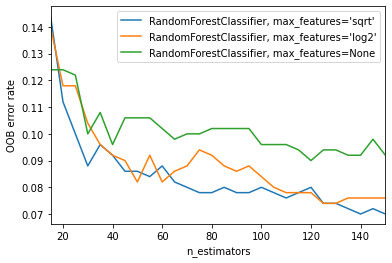

In [131]:
# Prepara o gráfico "OOB error rate" vs. "n_estimators" 
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# 9. Tuning dos Hyperparametros
Grid Search e Randomized Search são as duas técnicas mais amplamente utilizadas no ajuste de hiperparâmetros. 

## 9.1 Tuning Com GridSearch
Grid Search pesquisa exaustivamente cada combinação dos valores de hiperparâmetros especificados.

In [80]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

# Load  X e y data a partir do dataset
cancer = datasets.load_breast_cancer()

In [75]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [76]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [77]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [71]:
X = cancer.data
y = cancer.target

X.shape

(569, 30)

In [74]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [93]:
logModel = LogisticRegression()

# Contruimos a grid de parâmetros
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

param_grid

[{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
  'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
         4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
         2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
         1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
         5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
  'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
  'max_iter': [100, 1000, 2500, 5000]}]

GridSearchCV tem um parâmetro **refit** que por omissão é True<br>

Isto significa que o GridSearchCV executará o treino em todo o conjunto de treino usando os melhores hiperparâmetros encontrados após a validação cruzada.<br>
Em seguida, retornará o objeto estimador treinado, no qual se pode chamar diretamente o método de previsão.

In [94]:
# por omissão refit = True
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
clf

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

Vamos fazer o fit para 3 Folds de:
- 20 valores possíveis de C
- 4 possíveis penalty
- 5 possíveis solvers
- 4 máximos para iterações <br>
Portanto no total vamos fazer 20x4x5x4 = 1600 candidatos x número de folds (3)<br>
Ou seja 4800 fits

In [95]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\sonia.quaresma\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.3725796  ...        nan 0.92091339 0.92267706]
  warnings.warn(


In [96]:
best_clf.best_estimator_

LogisticRegression(C=3792.690190732246, max_iter=1000, solver='newton-cg')

In [97]:
print (f'Accuracy : {best_clf.score(X,y):.3f}')

Accuracy : 0.984


Vamos então fazer a previsão usando o primeiro array do nosso X

In [100]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [107]:
pred = clf.predict(X[0].reshape(1, -1))
pred[0]

0

In [109]:
pred_prob = clf.predict_proba(X[0].reshape(1, -1))
pred_prob

array([[1.0000000e+00, 6.9541328e-24]])

## 9.2 Tuning com RandomizedSearchCV
Em contraste com a pesquisa em grid, nem todos os valores de parâmetros fornecidos são testados na pesquisa aleatória.<br>
Em vez disso, um número fixo de configurações de parâmetros é selecionado das distribuições especificadas. <br>
- A amostragem sem reposição é realizada se todos os parâmetros forem apresentados em forma de lista. <br>
- A amostragem com substituição é usada se pelo menos um parâmetro for fornecido como distribuição. A forma como será feita a amostragem numa RandomizedSearch pode ser especificada previamente.<br>

Para cada hiperparâmetro, pode ser especificada uma distribuição sobre valores possíveis ou uma lista de valores discretos (a serem amostrados uniformemente). Para os hiperparâmetros com valores contínuos, uma distribuição contínua deve ser especificada para aproveitar ao máximo a randomização. <br><br>

O principal benefício desta pesquisa é a diminuição do tempo de processamento

In [144]:
from scipy.stats import randint as sp_randint

exemplo = sp_randint(1, 11)
exemplo

In [145]:
# sp_randint pode ser usado nos parâmetros 
# exemplo é um objecto da rv_class
# o método rvs vai gerar random variate sample
# random_state pode ser usado
exemplo.rvs(20)

array([1, 2, 1, 9, 7, 4, 2, 9, 6, 2, 2, 3, 6, 4, 7, 8, 1, 7, 3, 3])

Em principio qualquer rvs pode ser passado

In [197]:
import scipy

a = scipy.stats.expon(scale=.1)
a.rvs(10)

array([0.10091793, 0.10051865, 0.03362819, 0.01477418, 0.03232137,
       0.05834885, 0.00848315, 0.1066834 , 0.03880981, 0.3643341 ])

In [201]:
# distribuição normal com mean .25 stddev 0.1, entre 0 e 1
b = scipy.stats.truncnorm(a=0, b=1, loc=0.25, scale=0.1)
b.rvs(10)

array([0.29136392, 0.26450879, 0.32098493, 0.30378852, 0.34268256,
       0.2611498 , 0.28616111, 0.28696801, 0.31057475, 0.29971306])

In [202]:
# distribuição uniforme entre .01 e .2
c = scipy.stats.uniform(0.01, 0.199)
c.rvs(10)

array([0.13449872, 0.20424494, 0.09027806, 0.17745511, 0.06906543,
       0.02339161, 0.02288703, 0.18387275, 0.11842659, 0.1326488 ])

In [180]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets

# Load the X and y data from the dataset
cancer = datasets.load_breast_cancer()

In [148]:
X = cancer.data
y = cancer.target

X.shape

(569, 30)

In [150]:
param_dist = {"max_depth": [3, 5], 
    "max_features": sp_randint(1, 11), 
    "min_samples_split": sp_randint(2, 11), 
    "bootstrap": [True, False], 
    "criterion": ["gini", "entropy"]} 

param_dist

{'max_depth': [3, 5],
 'max_features': <scipy.stats._distn_infrastructure.rv_frozen at 0x2074d90e0d0>,
 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen at 0x2074d90e700>,
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

In [163]:
# construir o classificador indicando o nº 
# de árvores a crescer na floresta
clf = RandomForestClassifier(n_estimators=50)
clf

RandomForestClassifier(n_estimators=50)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=2023)
X_train.shape

(483, 30)

In [166]:
random_search = RandomizedSearchCV(clf, 
                                   param_distributions=param_dist, 
                                   n_iter=20, 
                                   cv=5) 

random_search.fit(X_train, y_train)
print(random_search.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 4, 'min_samples_split': 5}


In [167]:
X_test[12]

array([1.152e+01, 1.493e+01, 7.387e+01, 4.063e+02, 1.013e-01, 7.808e-02,
       4.328e-02, 2.929e-02, 1.883e-01, 6.168e-02, 2.562e-01, 1.038e+00,
       1.686e+00, 1.862e+01, 6.662e-03, 1.228e-02, 2.105e-02, 1.006e-02,
       1.677e-02, 2.784e-03, 1.265e+01, 2.119e+01, 8.088e+01, 4.918e+02,
       1.389e-01, 1.582e-01, 1.804e-01, 9.608e-02, 2.664e-01, 7.809e-02])

In [168]:
y_test[12]

1

In [178]:
random_search.predict(X_test[12].reshape(1, -1))[0]

1

In [182]:
cm = confusion_matrix(y_test, random_search.predict(X_test))
print(pd.DataFrame(cm,columns = ['pred: 0','pred: 1'],
                   index = ['real: 0','real: 1']))

         pred: 0  pred: 1
real: 0       29        4
real: 1        0       53


## 9.3 Tuning com Nested CV
A validação cruzada pode ser usada tanto para ajuste de hiperparâmetros quanto para estimativa do desempenho de generalização do modelo. No entanto, usar a mesma validação cruzada para ambos os fins simultaneamente pode levar a um aumento de bias, especialmente quando o tamanho do conjunto de dados é pequeno. <br>Os modelos podem facilmente ajustar demais o conjunto de dados com ajuste de hiperparâmetros, e o mesmo modelo será escolhido para avaliação. <br>Para evitar esse bias, é usada nested validação cruzada, que incorpora um loop adicional de validação cruzada para seleção de modelo. <br>


Este método envolve dois níveis de validação cruzada:
- CV externo para seleção do melhor modelo
- e um CV interno para pesquisa de parâmetros 

O loop CV externo define as divisões do conjunto de dados que o loop CV interno usa para encontrar o melhor conjunto de hiperparâmetros executando GridSearchCV ou RandomSearchCV. Em seguida, as melhores pontuações, parâmetros e modelos são armazenados e usados para treinar um modelo final em todo o conjunto de dados.

Desta forma, o nested CV fornece uma boa estimativa do desempenho do modelo, evitando o overfitting.

In [192]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# cria o dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)

X

array([[-5.09180894,  0.62982401, -1.56637522, ..., -5.75139697,
        -1.26632999,  1.38003548],
       [ 1.79142035,  1.53228466,  2.15499957, ..., -3.36234377,
         1.54280911,  1.45120234],
       [-7.57085584, -0.2920971 , -3.63471958, ..., -4.34397246,
        -1.96120901,  3.26295049],
       ...,
       [ 6.52439854,  0.63786484,  1.25975251, ..., -2.64387023,
         1.58504635,  1.77162916],
       [ 2.97193516,  2.78895124, -0.8083023 , ...,  4.84079601,
        -1.78274376, -0.14141052],
       [ 1.38863762,  0.18337514,  3.10736912, ..., -1.83700097,
         2.09963137, -1.76449296]])

In [188]:
# configura o loop exterior
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1999)

# prepara a lista para o loop exterior
outer_results = list()
outer_results

[]

In [190]:
# configura o loop CV interior
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1999)


# define o espaço de procura
param_grid = {'n_estimators':  [10, 100, 500],
              'max_features': [2, 4, 6] }

In [189]:
# define o modelo
model = RandomForestClassifier(random_state=1999)

In [193]:
# para o loop exterior em que vamos ter KFold (10 blocos)
for train_idx, test_idx in cv_outer.split(X):
    
    # split dos dados com os indexes dados pelo split
    X_train, X_test = X[train_idx, :], X[test_idx, :]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # define a procura dos hyperparâmetros
    search = GridSearchCV(model, param_grid, 
                          scoring='accuracy',
                          cv=cv_inner,
                          refit=True)
    # executa a procura fazendo o fit
    result = search.fit(X_train, y_train)
    
    # regista o melhor fit
    best_model = result.best_estimator_
    # prevê com o modelo usando o hold-out dataset
    y_pred = best_model.predict(X_test)
    # avalia o modelo
    acc = accuracy_score(y_test, y_pred)
    
    # regista os resultados do outer CV na lista
    outer_results.append(acc)
    # reporta o progresso
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
    
# sumariza a performance estimada do modelo
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

>acc=0.980, est=0.926, cfg={'max_features': 2, 'n_estimators': 100}
>acc=0.930, est=0.930, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.930, est=0.918, cfg={'max_features': 2, 'n_estimators': 100}
>acc=0.950, est=0.920, cfg={'max_features': 4, 'n_estimators': 500}
>acc=0.930, est=0.928, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.940, est=0.920, cfg={'max_features': 4, 'n_estimators': 500}
>acc=0.880, est=0.933, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.910, est=0.939, cfg={'max_features': 6, 'n_estimators': 100}
>acc=0.920, est=0.929, cfg={'max_features': 2, 'n_estimators': 100}
>acc=0.930, est=0.924, cfg={'max_features': 4, 'n_estimators': 100}
Accuracy: 0.930 (0.024)


#### De uma forma mais condensada

In [186]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

# Carrega os Dados
cancer = datasets.load_breast_cancer()

X = cancer.data
y = cancer.target

# escolhe o modelo
rf = RandomForestClassifier()

# define a grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

# define os loops de CV
outer_cv = KFold(n_splits=3, shuffle=True, random_state=2023)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=2023)

# Define a procura de hyperparâmetros do loop interior de CV 
model = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=inner_cv, n_jobs=-1
)

# Define a seleção e avaliação de modelo no loop exterior de CV 
scores = cross_val_score(model, X, y,
                        scoring='accuracy',
                        cv=outer_cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.958 (0.011)
